
## Attribute Information
##### 1. Activity: atividade realizada
##### 2. HRmean: média da fraquência cardíaca durante a atividade
##### 3. HRmax: máximo da fraquência cardíaca durante a atividade
##### 4. HRmin: mínimo da fraquência cardíaca durante a atividade
##### 5. Duration: duração da atividade realizada

## Criação do Dataset

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("Datasets/sleep.csv")

## Exploração de Dados

In [3]:
df.columns

Index(['HRmean', 'HRmax', 'HRmin', 'HalfHourBeforeSleep', 'DeepSleepBegin',
       'LightSleep', 'DeepSleep'],
      dtype='object')

In [4]:
df.head()


,HRmean,HRmax,HRmin,HalfHourBeforeSleep,DeepSleepBegin,LightSleep,DeepSleep
0,74,94,56,2020-01-12T22:49:00.000Z,NaN,24,0
1,60,81,48,2020-02-16T23:56:00.000Z,2020-02-17T00:26:00.000Z,234,113
2,78,109,61,2020-05-05T00:03:00.000+01:00,NaN,85,0
3,82,102,71,2020-05-10T23:57:00.000+01:00,2020-05-11T04:04:00.000+01:00,434,35
4,77,101,70,2020-05-12T23:33:00.000+01:00,NaN,24,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   HRmean               323 non-null    int64 
 1   HRmax                323 non-null    int64 
 2   HRmin                323 non-null    int64 
 3   HalfHourBeforeSleep  323 non-null    object
 4   DeepSleepBegin       303 non-null    object
 5   LightSleep           323 non-null    int64 
 6   DeepSleep            323 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 17.8+ KB


In [6]:
df['HalfHourBeforeSleep'] = pd.to_datetime(df['HalfHourBeforeSleep'])
df['DeepSleepBegin'] = pd.to_datetime(df['DeepSleepBegin'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   HRmean               323 non-null    int64 
 1   HRmax                323 non-null    int64 
 2   HRmin                323 non-null    int64 
 3   HalfHourBeforeSleep  323 non-null    object
 4   DeepSleepBegin       303 non-null    object
 5   LightSleep           323 non-null    int64 
 6   DeepSleep            323 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 17.8+ KB


In [8]:
df['DurationUntilDeepSleep'] = df['DeepSleepBegin'] - df['HalfHourBeforeSleep']
df['DurationUntilDeepSleep']=df['DurationUntilDeepSleep']/np.timedelta64(1,'m')

In [9]:
df['TotalSleep'] = (df['LightSleep'] + df['DeepSleep'])

In [10]:
df.head()

,HRmean,HRmax,HRmin,HalfHourBeforeSleep,DeepSleepBegin,LightSleep,DeepSleep,DurationUntilDeepSleep,TotalSleep
0,74,94,56,2020-01-12 22:49:00+00:00,NaN,24,0,NaN,24
1,60,81,48,2020-02-16 23:56:00+00:00,2020-02-17 00:26:00+00:00,234,113,30.0,347
2,78,109,61,2020-05-05 00:03:00+01:00,NaN,85,0,NaN,85
3,82,102,71,2020-05-10 23:57:00+01:00,2020-05-11 04:04:00+01:00,434,35,247.0,469
4,77,101,70,2020-05-12 23:33:00+01:00,NaN,24,0,NaN,24


In [11]:
df.head()

,HRmean,HRmax,HRmin,HalfHourBeforeSleep,DeepSleepBegin,LightSleep,DeepSleep,DurationUntilDeepSleep,TotalSleep
0,74,94,56,2020-01-12 22:49:00+00:00,NaN,24,0,NaN,24
1,60,81,48,2020-02-16 23:56:00+00:00,2020-02-17 00:26:00+00:00,234,113,30.0,347
2,78,109,61,2020-05-05 00:03:00+01:00,NaN,85,0,NaN,85
3,82,102,71,2020-05-10 23:57:00+01:00,2020-05-11 04:04:00+01:00,434,35,247.0,469
4,77,101,70,2020-05-12 23:33:00+01:00,NaN,24,0,NaN,24


In [12]:
df.describe()

,HRmean,HRmax,HRmin,LightSleep,DeepSleep,DurationUntilDeepSleep,TotalSleep
count,323.000000,323.000000,323.000000,323.000000,323.000000,303.000000,323.000000
mean,71.495356,91.476780,58.795666,292.690402,141.572755,77.663366,434.263158
std,10.482275,18.933897,9.256274,110.592125,69.290034,81.863108,159.639040
min,47.000000,48.000000,41.000000,0.000000,0.000000,30.000000,3.000000
25%,65.000000,78.000000,52.000000,257.000000,101.500000,40.000000,403.000000
50%,72.000000,94.000000,55.000000,316.000000,153.000000,58.000000,486.000000
75%,78.000000,105.000000,67.000000,366.000000,191.000000,83.000000,534.000000
max,109.000000,192.000000,86.000000,526.000000,315.000000,1207.000000,662.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  323 non-null    int64  
 1   HRmax                   323 non-null    int64  
 2   HRmin                   323 non-null    int64  
 3   HalfHourBeforeSleep     323 non-null    object 
 4   DeepSleepBegin          303 non-null    object 
 5   LightSleep              323 non-null    int64  
 6   DeepSleep               323 non-null    int64  
 7   DurationUntilDeepSleep  303 non-null    float64
 8   TotalSleep              323 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 22.8+ KB


In [14]:
df.isna().any()

HRmean                    False
HRmax                     False
HRmin                     False
HalfHourBeforeSleep       False
DeepSleepBegin             True
LightSleep                False
DeepSleep                 False
DurationUntilDeepSleep     True
TotalSleep                False
dtype: bool

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 322
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  303 non-null    int64  
 1   HRmax                   303 non-null    int64  
 2   HRmin                   303 non-null    int64  
 3   HalfHourBeforeSleep     303 non-null    object 
 4   DeepSleepBegin          303 non-null    object 
 5   LightSleep              303 non-null    int64  
 6   DeepSleep               303 non-null    int64  
 7   DurationUntilDeepSleep  303 non-null    float64
 8   TotalSleep              303 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 23.7+ KB


In [17]:
df.isna().any()


HRmean                    False
HRmax                     False
HRmin                     False
HalfHourBeforeSleep       False
DeepSleepBegin            False
LightSleep                False
DeepSleep                 False
DurationUntilDeepSleep    False
TotalSleep                False
dtype: bool

In [18]:
df = df.drop(['HalfHourBeforeSleep', 'DeepSleepBegin', 'LightSleep'], axis=1)


In [19]:
obj_cols = []
num_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 322
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  303 non-null    int64  
 1   HRmax                   303 non-null    int64  
 2   HRmin                   303 non-null    int64  
 3   DeepSleep               303 non-null    int64  
 4   DurationUntilDeepSleep  303 non-null    float64
 5   TotalSleep              303 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 16.6 KB


#### Análise HRmax

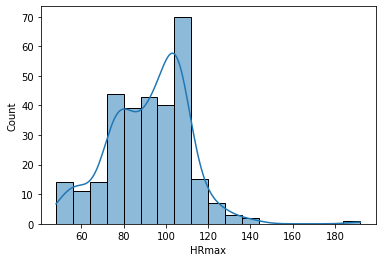

In [21]:
sns.histplot(df['HRmax'], kde=True);

In [22]:
print("Skewness: %f" % df['HRmax'].skew())
print("Kurtosis: %f" %df['HRmax'].kurt())

Skewness: 0.178531
Kurtosis: 1.991187


#### Análise HRmean 

<AxesSubplot:xlabel='HRmean', ylabel='Count'>

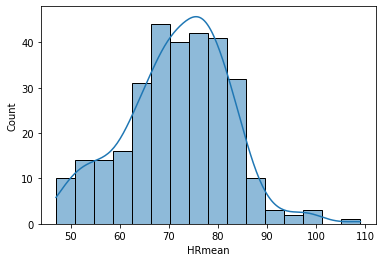

In [23]:
sns.histplot(df['HRmean'], kde=True)


In [24]:
print("Skewness: %f" % df['HRmean'].skew())
print("Kurtosis: %f" %df['HRmean'].kurt())

Skewness: -0.108417
Kurtosis: 0.238508


#### Análise HRmin

<AxesSubplot:xlabel='HRmin', ylabel='Count'>

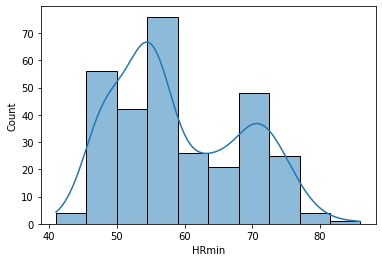

In [25]:
sns.histplot(df['HRmin'], kde=True)


In [26]:
print("Skewness: %f" % df['HRmin'].skew())
print("Kurtosis: %f" %df['HRmin'].kurt())

Skewness: 0.457728
Kurtosis: -0.903098


#### Remoção de dados não apropriados

<AxesSubplot:xlabel='TotalSleep', ylabel='Count'>

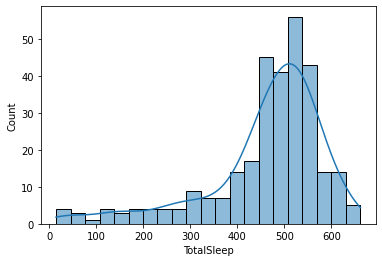

In [27]:
sns.histplot(df['TotalSleep'], kde=True)

In [28]:
df = df[df['TotalSleep'] > 299]


<AxesSubplot:xlabel='TotalSleep', ylabel='Count'>

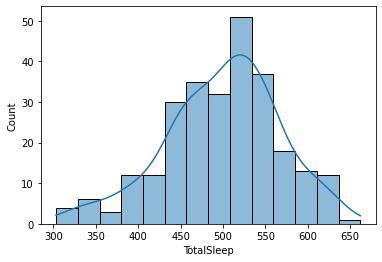

In [29]:
sns.histplot(df['TotalSleep'], kde=True)

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1 to 322
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  266 non-null    int64  
 1   HRmax                   266 non-null    int64  
 2   HRmin                   266 non-null    int64  
 3   DeepSleep               266 non-null    int64  
 4   DurationUntilDeepSleep  266 non-null    float64
 5   TotalSleep              266 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.5 KB
None


In [31]:
df['DeepSleepPercentage'] = ( df['DeepSleep'] / df['TotalSleep'] ) * 100


In [32]:
df = df.drop(['DeepSleep', 'TotalSleep', 'DeepSleepPercentage'], axis=1)

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1 to 322
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  266 non-null    int64  
 1   HRmax                   266 non-null    int64  
 2   HRmin                   266 non-null    int64  
 3   DurationUntilDeepSleep  266 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 10.4 KB


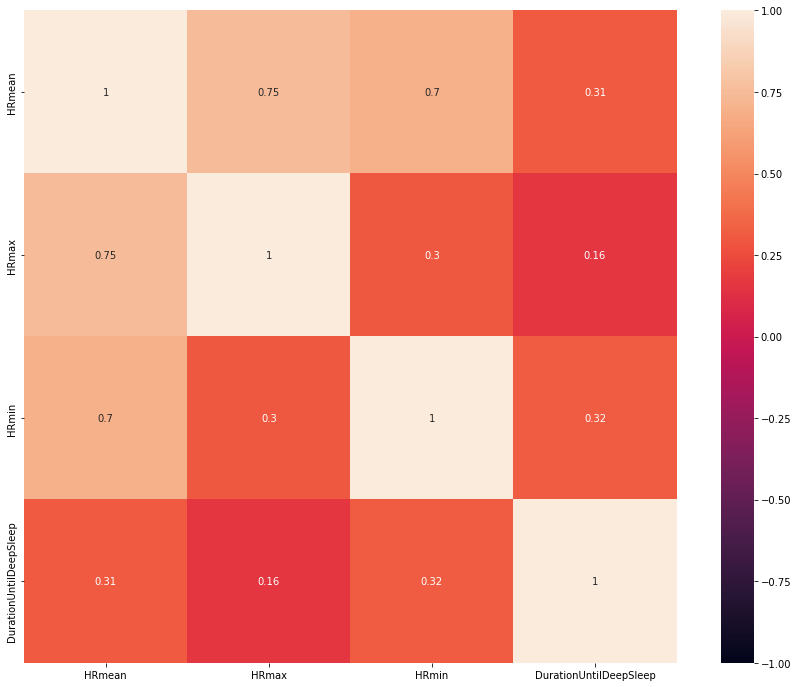

In [34]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, vmin= -1, vmax = 1, square=True, annot =True);

## Preparação de Dados

### Verificar Balanceamento do Dataset   

<AxesSubplot:xlabel='DurationUntilDeepSleep', ylabel='Count'>

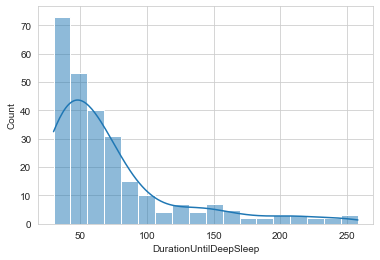

In [35]:
sns.set_style('whitegrid')
sns.histplot(df['DurationUntilDeepSleep'], kde=True)


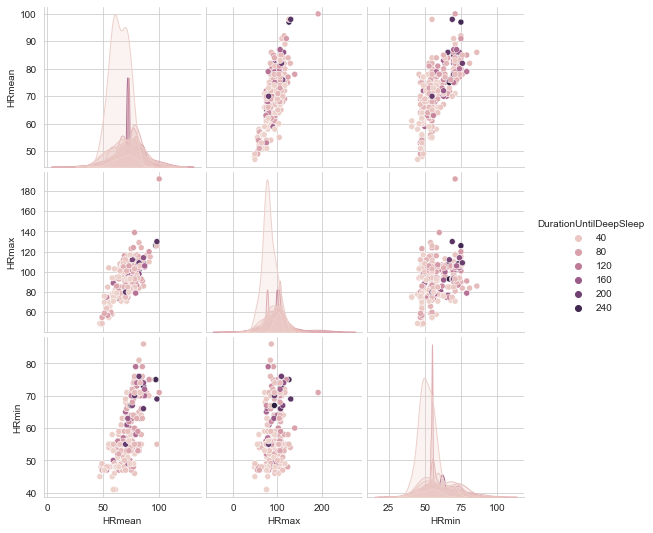

In [36]:
sns.pairplot(df,hue="DurationUntilDeepSleep");

### Dados Numéricos

#### HRmean

In [37]:
''' Detection '''
# IQR
Q1 = np.percentile(df['HRmean'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['HRmean'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

''' Removing the Outliers '''
df = df[(df['HRmean'] <= (Q3+1.5*IQR)) & (df['HRmean'] >= (Q1-1.5*IQR))]
 
print("New Shape: ", df.shape)

Old Shape:  (266, 4)
New Shape:  (261, 4)


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_4544\1620905041.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['HRmean'], 25,
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_4544\1620905041.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['HRmean'], 75,


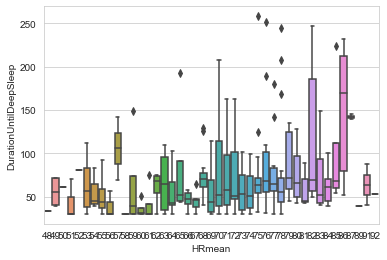

In [38]:
ax = sns.boxplot(x=df["HRmean"], y=df["DurationUntilDeepSleep"])


#### HRmax

In [39]:
''' Detection '''
# IQR
Q1 = np.percentile(df['HRmax'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['HRmax'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

 
''' Removing the Outliers '''
df = df[(df['HRmax'] <= (Q3+1.5*IQR)) & (df['HRmax'] >= (Q1-1.5*IQR))]


print("New Shape: ", df.shape)

Old Shape:  (261, 4)
New Shape:  (261, 4)


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_4544\745463450.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['HRmax'], 25,
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_4544\745463450.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['HRmax'], 75,


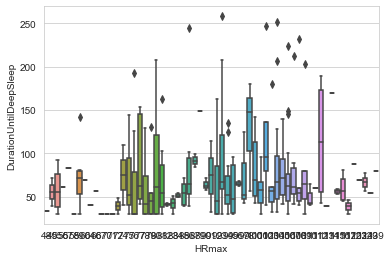

In [40]:
ax = sns.boxplot(x=df["HRmax"], y=df["DurationUntilDeepSleep"])


#### HRmin

In [41]:
''' Detection '''
# IQR
Q1 = np.percentile(df['HRmin'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['HRmin'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
''' Removing the Outliers '''
df = df[(df['HRmin'] <= (Q3+1.5*IQR)) & (df['HRmin'] >= (Q1-1.5*IQR))]


print("New Shape: ", df.shape)

Old Shape:  (261, 4)
New Shape:  (261, 4)


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_4544\686709792.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['HRmin'], 25,
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_4544\686709792.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['HRmin'], 75,


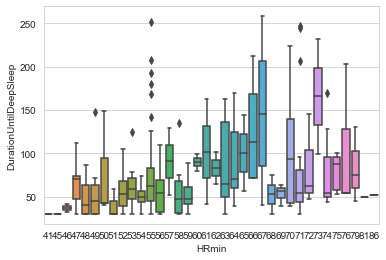

In [42]:
ax = sns.boxplot(x=df["HRmin"], y=df["DurationUntilDeepSleep"])


## Modelos

#### Separação Treino Teste

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1 to 322
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  261 non-null    int64  
 1   HRmax                   261 non-null    int64  
 2   HRmin                   261 non-null    int64  
 3   DurationUntilDeepSleep  261 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 18.3 KB


In [44]:

X = df.drop(['DurationUntilDeepSleep'], axis=1)
y = df['DurationUntilDeepSleep'].to_frame()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=2022)

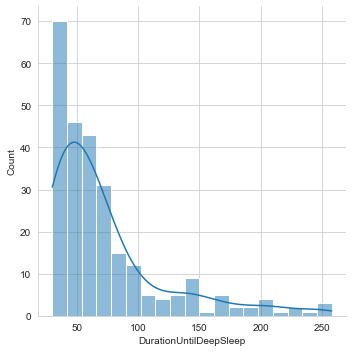

In [46]:
sns.displot(df["DurationUntilDeepSleep"], kde=True)

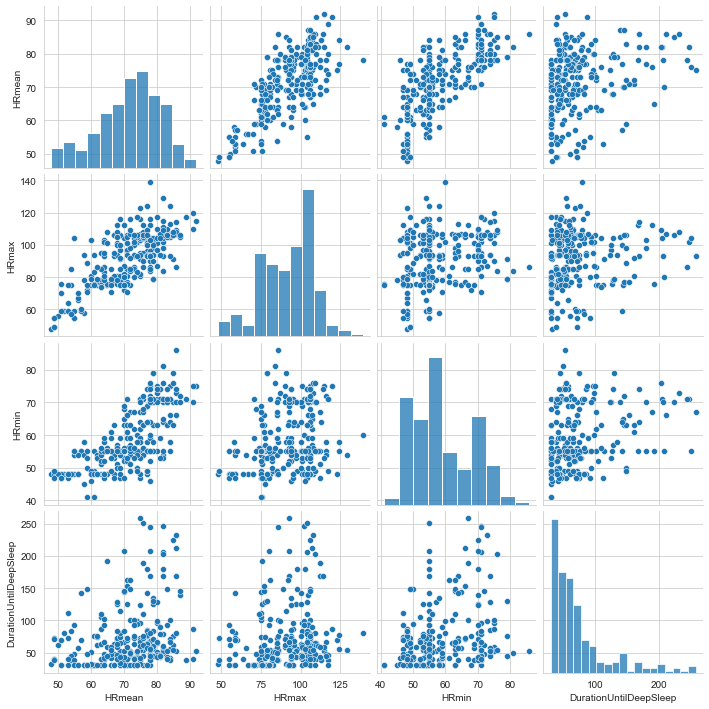

In [47]:
sns.pairplot(df)

### Regressão Linear

#### Treino e Previsão

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [49]:
model = make_pipeline(StandardScaler(), LinearRegression())
params= {}

In [50]:
grid = GridSearchCV(model,params, cv=KFold(n_splits=10), n_jobs=1, verbose=2,
                    return_train_score=True, scoring='neg_mean_absolute_error', refit=True)


In [51]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=1, param_grid={}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=2)

In [52]:
predictions = grid.predict(X_test)
predictions

array([[ 60.67792024],
       [100.44153873],
       [ 61.01699183],
       [ 98.26192599],
       [ 77.59415867],
       [ 80.252519  ],
       [ 86.69366071],
       [ 60.13959742],
       [ 71.29176449],
       [ 98.97604477],
       [ 88.0565271 ],
       [ 56.10964501],
       [ 65.27559105],
       [ 65.07240081],
       [ 85.26921778],
       [ 70.10669535],
       [ 68.86297943],
       [ 56.42911955],
       [ 48.95038191],
       [ 98.96531779],
       [ 60.30866898],
       [ 73.71368078],
       [ 93.97007298],
       [ 51.74841823],
       [ 69.78629234],
       [ 94.37651704],
       [ 59.64432691],
       [ 76.19024125],
       [ 54.15574931],
       [ 66.88168946],
       [ 68.12633384],
       [ 75.46339418],
       [ 56.54641311],
       [ 52.55443759],
       [ 65.87348911],
       [ 65.19934852],
       [ 62.23131218],
       [ 66.91981072],
       [ 70.49554366],
       [ 72.10164206],
       [ 71.59364328],
       [ 48.67882716],
       [ 74.55874986],
       [ 82

#### Avaliação

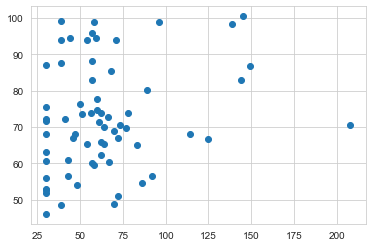

In [53]:
plt.scatter(y_test, predictions)

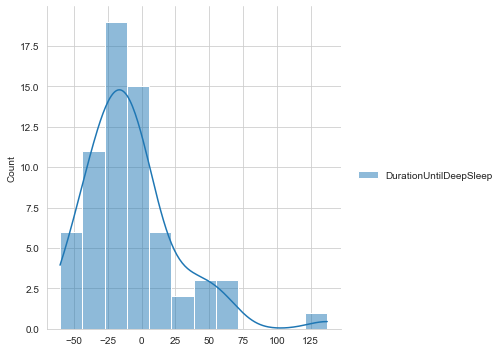

In [54]:
sns.displot((y_test-predictions), kde=True)

In [55]:
from sklearn import metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 26.60002787394831
MSE: 1199.0304568608174
RMSE: 34.62701917377263


### Árvore de Decisão

#### Treino e Previsão

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
clf = DecisionTreeRegressor(random_state=2022)
params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
             'min_samples_leaf': range(1,5)}

In [59]:
grid = GridSearchCV(clf, params, cv=KFold(n_splits=10), n_jobs=1, verbose=2, return_train_score=True, scoring='neg_mean_absolute_error', refit=True)

In [60]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=2; total time=   0.0s
[CV] END ........criterion=squared_error, min_

[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(random_state=2022), n_jobs=1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'min_samples_leaf': range(1, 5)},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [61]:
print(f'The best parameters are: {grid.best_params_}')
print(f'The best score that we got is: {grid.best_score_}')

The best parameters are: {'criterion': 'squared_error', 'min_samples_leaf': 4}
The best score that we got is: -45.083219298245616


In [62]:
predictions = grid.predict(X_test)
predictions

array([ 65.66666667, 144.        ,  73.42857143, 144.        ,
        46.83333333,  55.5       ,  65.2       ,  65.66666667,
        49.75      , 121.5       , 105.75      ,  69.6       ,
        61.        ,  47.        , 105.75      ,  72.75      ,
       121.4       ,  39.5       ,  43.42857143,  59.16666667,
        39.5       ,  47.        , 121.5       ,  76.5       ,
       130.57142857,  59.16666667,  39.5       ,  46.83333333,
        39.5       ,  39.5       , 121.4       ,  46.83333333,
        45.75      ,  65.66666667,  61.        ,  39.5       ,
        69.6       ,  61.        ,  47.        ,  43.2       ,
        43.2       ,  65.66666667, 130.57142857, 105.75      ,
        33.5       , 130.57142857,  73.42857143,  35.2       ,
       121.5       ,  43.42857143,  72.75      ,  49.25      ,
        72.75      ,  63.5       ,  92.85714286,  46.83333333,
       130.57142857,  46.83333333,  76.5       , 107.5       ,
        76.5       ,  62.6       ,  65.66666667,  72.75

#### Avaliação

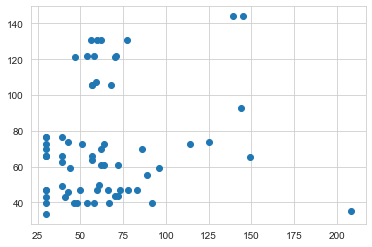

In [63]:
plt.scatter(y_test, predictions)


(array([ 9., 14., 16., 13.,  9.,  3.,  1.,  0.,  0.,  1.]),
 array([-74.57142857, -49.83428571, -25.09714286,  -0.36      ,
         24.37714286,  49.11428571,  73.85142857,  98.58857143,
        123.32571429, 148.06285714, 172.8       ]),
 <BarContainer object of 10 artists>)

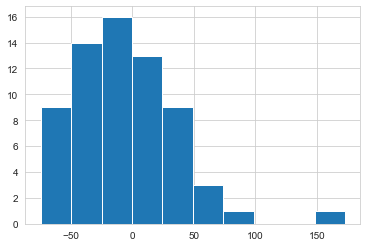

In [64]:
plt.hist(y_test - predictions.reshape(66,1))

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 32.32683982683982
MSE: 1804.3678432282006
RMSE: 42.47785120775533


### SVM - Support Vector Machine

#### Treino e Previsão

In [104]:
from sklearn.svm import SVR


In [105]:
params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
clf = SVR()

In [106]:
grid = GridSearchCV(clf, params, cv=KFold(n_splits=10), n_jobs=1, verbose=2, return_train_score=True, scoring='neg_mean_absolute_error', refit=True)

In [107]:
grid.fit(X_train,y_train.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma

[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   1.4s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.6s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   1.8s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVR(), n_jobs=1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [108]:
print(f'The best parameters are: {grid.best_params_}')
print(f'The best score that we got is: {grid.best_score_}')

The best parameters are: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
The best score that we got is: -33.52685803297773


In [109]:
predictions = grid.predict(X_test)
predictions

array([44.78456921, 76.59150026, 47.0570855 , 74.43013533, 56.76491386,
       62.9902171 , 67.37929436, 45.49125577, 55.53560374, 71.28328237,
       69.58780097, 40.3288769 , 53.91133781, 47.34172816, 63.76900813,
       54.10468943, 48.83746333, 39.67919817, 39.96122691, 76.06806906,
       46.54300031, 55.20233024, 67.33206896, 40.89813536, 62.68794038,
       74.7843305 , 42.58715569, 54.36447837, 43.65233945, 47.63531649,
       47.80678783, 55.7653249 , 46.72319738, 39.70860285, 52.88178537,
       46.20848695, 45.37570652, 51.23071101, 55.56612112, 48.16300949,
       50.37692948, 38.7640404 , 56.64553233, 67.02257341, 32.75506831,
       54.02794515, 50.46598215, 49.02946838, 69.20120217, 43.55958399,
       51.05332492, 65.36542415, 50.83957426, 76.08866523, 57.37945849,
       53.36724641, 56.37681671, 63.05394478, 59.12070445, 69.73357372,
       60.64319031, 80.31831219, 40.00059092, 50.22874662, 41.92974285,
       52.64259244])

#### Avaliação

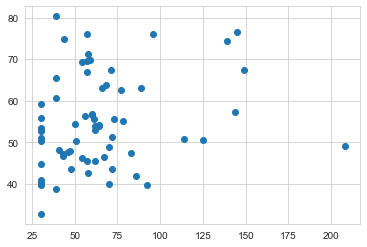

In [110]:
plt.scatter(y_test, predictions)

(array([ 8., 19., 21.,  9.,  2.,  4.,  2.,  0.,  0.,  1.]),
 array([-41.31831219, -21.28942781,  -1.26054343,  18.76834095,
         38.79722533,  58.82610972,  78.8549941 ,  98.88387848,
        118.91276286, 138.94164724, 158.97053162]),
 <BarContainer object of 10 artists>)

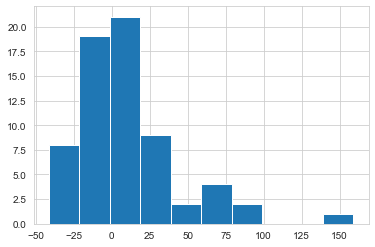

In [111]:
plt.hist(y_test - predictions.reshape(66,1))


In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 22.604692517127653
MSE: 1200.011775438819
RMSE: 34.64118611477989


### Florestas Aleatórias (Random Forests)

#### Treino e Previsão

In [75]:
from sklearn.ensemble import RandomForestRegressor


In [76]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
clf = RandomForestRegressor(random_state=2022)

In [77]:
grid = GridSearchCV(clf, params, cv=KFold(n_splits=10), n_jobs=1, verbose=2, return_train_score=True, scoring='neg_mean_absolute_error', refit=True)

In [78]:
grid.fit(X_train,y_train.values.ravel())

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV]

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, 

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sample

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, 

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_feat

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, 

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=2

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=110, max_features

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_featur

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_feat

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_feat

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_featu

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=2022), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [79]:
print(f'The best parameters are: {grid.best_params_}')
print(f'The best score that we got is: {grid.best_score_}')

The best parameters are: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 1000}
The best score that we got is: -39.69715222014951


In [80]:
predictions = grid.predict(X_test)
predictions

array([ 61.30698141, 110.97326686,  57.04157703, 118.14603804,
        68.62184916,  75.48393076,  83.61051102,  61.96676014,
        77.56326444,  87.48091644, 107.99298066,  44.1531513 ,
        65.9619834 ,  65.84258186, 108.15390858,  63.91271162,
        68.09572244,  44.83507918,  57.30557336,  83.09126796,
        56.87777604,  72.17322494, 112.06392801,  60.94862688,
        88.16474344,  78.80546254,  53.41907496,  60.58996389,
        44.76929823,  54.26894551,  72.85343725,  64.52845007,
        52.37821445,  52.95850295,  65.02499569,  55.86536157,
        60.01751107,  65.44497731,  66.58454871,  56.65399102,
        69.58747974,  50.97796944,  99.35155245,  98.40950009,
        52.02313762,  90.54848865,  56.65619357,  57.92543709,
       109.31736065,  57.62013372,  62.57304855, 106.68055227,
        62.00210565,  85.39887507,  91.25226141,  60.93077442,
       101.20766831,  67.16107513,  87.77434441, 100.09642229,
        86.98326559, 102.16095319,  53.28672318,  59.76

#### Avaliação

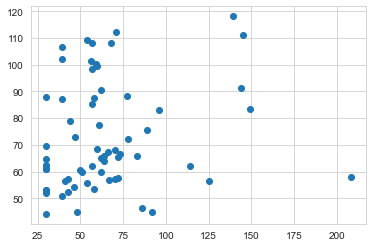

In [81]:
plt.scatter(y_test, predictions)

(array([ 6., 17., 17., 17.,  3.,  3.,  2.,  0.,  0.,  1.]),
 array([-67.68055227, -45.90504075, -24.12952923,  -2.35401772,
         19.4214938 ,  41.19700532,  62.97251684,  84.74802835,
        106.52353987, 128.29905139, 150.07456291]),
 <BarContainer object of 10 artists>)

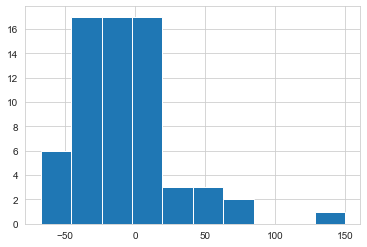

In [82]:
plt.hist(y_test - predictions.reshape(66,1))

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 27.466568599081626
MSE: 1342.1206897749528
RMSE: 36.63496539885022


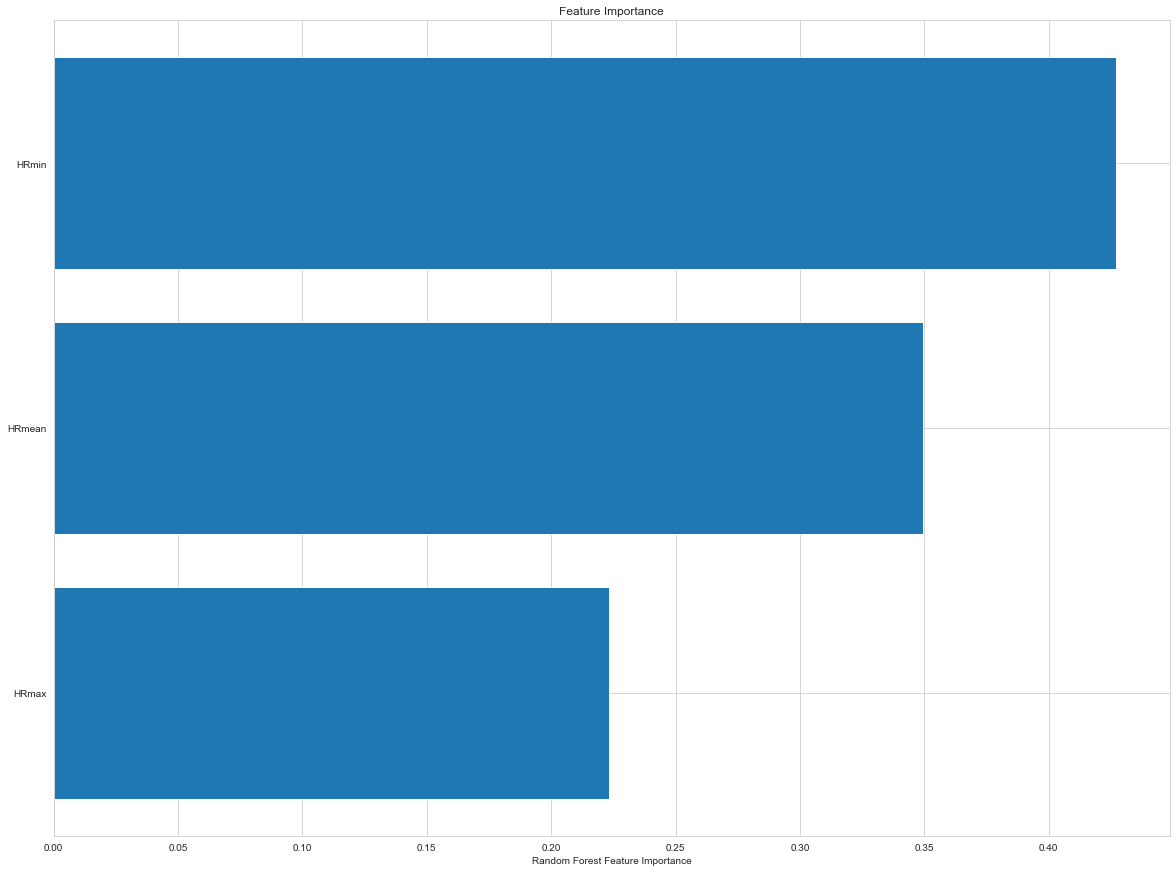

In [84]:
plt.figure(figsize=(20,15))
importance = grid.best_estimator_.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[X.columns.to_list()[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

### Redes Neuronais Artificiais

#### Treino e Previsão

In [88]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [89]:
def build_model(num_classes, activation='relu', loss='mean_squared_error'):
    model = tf.keras.Sequential()
   
    model.add(L.Dense(32, input_dim=3, activation='relu'))
    model.add(L.Dense(64, activation='relu'))
    model.add(L.Dense(32, activation='relu'))
    model.add(L.Dense(8, activation='relu'))
   
    model.add(L.Dropout(0.2))
    model.add(L.Dense(num_classes, activation='relu'))
   
    
    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['mae']
    )
    
    return model

In [90]:
model = build_model(1, activation='relu', loss='mean_squared_error')
model.summary()
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=300,
    verbose=1
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                128       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,593
Trainable params: 4,593
Non-traina

4/4 [==============================] - 0s 7ms/step - loss: 3008.1846 - mae: 44.8768 - val_loss: 1329.2261 - val_mae: 30.5379
Epoch 52/300
4/4 [==============================] - 0s 7ms/step - loss: 2995.4504 - mae: 42.0491 - val_loss: 1084.5265 - val_mae: 23.9342
Epoch 53/300
4/4 [==============================] - 0s 7ms/step - loss: 2708.8259 - mae: 36.7477 - val_loss: 1163.7946 - val_mae: 22.6949
Epoch 54/300
4/4 [==============================] - 0s 8ms/step - loss: 3202.5381 - mae: 36.9456 - val_loss: 1171.1094 - val_mae: 22.7874
Epoch 55/300
4/4 [==============================] - 0s 7ms/step - loss: 2915.6680 - mae: 35.0769 - val_loss: 1084.6847 - val_mae: 23.5612
Epoch 56/300
4/4 [==============================] - 0s 8ms/step - loss: 2675.1216 - mae: 38.0756 - val_loss: 1312.3984 - val_mae: 30.1594
Epoch 57/300
4/4 [==============================] - 0s 7ms/step - loss: 2699.2930 - mae: 39.9064 - val_loss: 1315.1119 - val_mae: 30.2226
Epoch 58/300
4/4 [=============================

4/4 [==============================] - 0s 7ms/step - loss: 2788.2600 - mae: 38.6401 - val_loss: 1202.3882 - val_mae: 27.5730
Epoch 111/300
4/4 [==============================] - 0s 7ms/step - loss: 2583.5332 - mae: 37.8209 - val_loss: 1152.9149 - val_mae: 26.3488
Epoch 112/300
4/4 [==============================] - 0s 8ms/step - loss: 2629.1980 - mae: 37.5399 - val_loss: 1140.7463 - val_mae: 25.9856
Epoch 113/300
4/4 [==============================] - 0s 7ms/step - loss: 2663.8740 - mae: 38.2583 - val_loss: 1234.5635 - val_mae: 28.2035
Epoch 114/300
4/4 [==============================] - 0s 7ms/step - loss: 2915.2371 - mae: 41.6017 - val_loss: 1352.6329 - val_mae: 30.6048
Epoch 115/300
4/4 [==============================] - 0s 6ms/step - loss: 2847.7400 - mae: 41.0935 - val_loss: 1403.2471 - val_mae: 31.3793
Epoch 116/300
4/4 [==============================] - 0s 7ms/step - loss: 2957.1606 - mae: 42.0566 - val_loss: 1497.8630 - val_mae: 32.6721
Epoch 117/300
4/4 [======================

Epoch 169/300
4/4 [==============================] - 0s 8ms/step - loss: 2537.0874 - mae: 37.0862 - val_loss: 1213.2051 - val_mae: 27.7026
Epoch 170/300
4/4 [==============================] - 0s 8ms/step - loss: 2695.8865 - mae: 38.7126 - val_loss: 1165.8503 - val_mae: 26.5631
Epoch 171/300
4/4 [==============================] - 0s 8ms/step - loss: 2571.0146 - mae: 37.8079 - val_loss: 1146.3524 - val_mae: 26.0267
Epoch 172/300
4/4 [==============================] - 0s 7ms/step - loss: 2612.9160 - mae: 36.8523 - val_loss: 1121.1500 - val_mae: 24.8194
Epoch 173/300
4/4 [==============================] - 0s 8ms/step - loss: 2642.0383 - mae: 36.0847 - val_loss: 1126.1345 - val_mae: 24.5122
Epoch 174/300
4/4 [==============================] - 0s 8ms/step - loss: 2864.0525 - mae: 35.9153 - val_loss: 1125.0680 - val_mae: 24.5509
Epoch 175/300
4/4 [==============================] - 0s 10ms/step - loss: 2820.5959 - mae: 37.4196 - val_loss: 1124.5726 - val_mae: 25.1560
Epoch 176/300
4/4 [=======

Epoch 228/300
4/4 [==============================] - 0s 7ms/step - loss: 2515.5996 - mae: 37.6984 - val_loss: 1275.0555 - val_mae: 29.3122
Epoch 229/300
4/4 [==============================] - 0s 7ms/step - loss: 2621.9739 - mae: 38.1626 - val_loss: 1147.1102 - val_mae: 26.4483
Epoch 230/300
4/4 [==============================] - 0s 7ms/step - loss: 2625.4990 - mae: 36.7279 - val_loss: 1102.0553 - val_mae: 24.7943
Epoch 231/300
4/4 [==============================] - 0s 7ms/step - loss: 2748.8699 - mae: 36.6450 - val_loss: 1109.0033 - val_mae: 24.9912
Epoch 232/300
4/4 [==============================] - 0s 7ms/step - loss: 2776.2129 - mae: 38.2408 - val_loss: 1110.8689 - val_mae: 24.8180
Epoch 233/300
4/4 [==============================] - 0s 7ms/step - loss: 2655.3257 - mae: 37.4824 - val_loss: 1121.8365 - val_mae: 25.2848
Epoch 234/300
4/4 [==============================] - 0s 7ms/step - loss: 2619.2839 - mae: 36.2924 - val_loss: 1158.7197 - val_mae: 26.5173
Epoch 235/300
4/4 [========

Epoch 287/300
4/4 [==============================] - 0s 8ms/step - loss: 2992.7856 - mae: 43.1620 - val_loss: 1352.5680 - val_mae: 30.8108
Epoch 288/300
4/4 [==============================] - 0s 7ms/step - loss: 2597.4224 - mae: 38.8647 - val_loss: 1190.5029 - val_mae: 27.5347
Epoch 289/300
4/4 [==============================] - 0s 7ms/step - loss: 2576.3254 - mae: 37.9707 - val_loss: 1128.0084 - val_mae: 25.9513
Epoch 290/300
4/4 [==============================] - 0s 8ms/step - loss: 2505.7810 - mae: 36.2412 - val_loss: 1101.6456 - val_mae: 24.9315
Epoch 291/300
4/4 [==============================] - 0s 8ms/step - loss: 2642.1763 - mae: 37.4615 - val_loss: 1108.1451 - val_mae: 25.1335
Epoch 292/300
4/4 [==============================] - 0s 10ms/step - loss: 2432.6802 - mae: 34.9668 - val_loss: 1147.6416 - val_mae: 26.3833
Epoch 293/300
4/4 [==============================] - 0s 9ms/step - loss: 2511.5149 - mae: 36.7254 - val_loss: 1188.0222 - val_mae: 27.2999
Epoch 294/300
4/4 [=======

In [91]:
predictions = model.predict(X_test)
predictions

array([[67.37469 ],
       [90.87018 ],
       [52.146484],
       [88.8369  ],
       [73.94782 ],
       [68.627106],
       [76.29265 ],
       [66.37589 ],
       [61.469604],
       [92.069336],
       [77.754745],
       [58.356018],
       [54.42958 ],
       [54.687256],
       [80.172485],
       [62.05172 ],
       [70.37044 ],
       [57.690453],
       [59.47532 ],
       [92.32472 ],
       [55.68331 ],
       [62.16121 ],
       [90.115944],
       [60.692856],
       [50.803974],
       [85.12336 ],
       [58.60746 ],
       [75.95894 ],
       [44.339966],
       [68.400116],
       [71.854805],
       [71.39505 ],
       [44.417564],
       [59.479958],
       [57.284203],
       [67.57619 ],
       [66.010925],
       [62.24904 ],
       [58.78853 ],
       [69.90744 ],
       [65.23761 ],
       [47.767395],
       [64.24244 ],
       [73.09894 ],
       [49.070873],
       [67.449265],
       [59.822342],
       [72.09739 ],
       [90.23975 ],
       [55.15105 ],


#### Avaliação

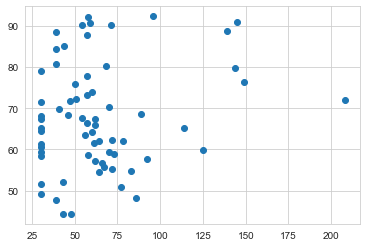

In [92]:
plt.scatter(y_test, predictions)

(array([14., 16., 16.,  9.,  4.,  3.,  3.,  0.,  0.,  1.]),
 array([-49.42230225, -30.88981094, -12.35731964,   6.17517166,
         24.70766296,  43.24015427,  61.77264557,  80.30513687,
         98.83762817, 117.37011948, 135.90261078]),
 <BarContainer object of 10 artists>)

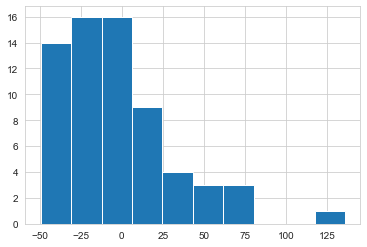

In [93]:
plt.hist(y_test - predictions.reshape(66,1))

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 26.164699438846473
MSE: 1166.8387268060046
RMSE: 34.159021162878844


### XGBoost

#### Treino e Previsão

In [95]:
import xgboost as xgb

In [96]:
params = {'max_depth': range (2, 10, 1), 'n_estimators': [50, 100, 250, 400, 500, 600, 750, 1000],
              'learning_rate': [0.001, 0.0025, 0.005, 0.0075, 0.01]
}
clf = xgb.XGBRegressor(use_label_encoder =False)

In [97]:
grid = GridSearchCV(clf, params, cv=KFold(n_splits=10), n_jobs=1, verbose=1, return_train_score=True, scoring='neg_mean_absolute_error', refit=True)

In [98]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constra...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=1,
      

In [99]:
print(f'The best parameters are: {grid.best_params_}')
print(f'The best score that we got is: {grid.best_score_}')

The best parameters are: {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 250}
The best score that we got is: -34.80450017125984


In [100]:
predictions = grid.predict(X_test)
predictions

array([39.32538 , 70.25668 , 39.32538 , 71.06073 , 50.026093, 54.64279 ,
       63.356804, 39.32538 , 50.026093, 69.896545, 77.78504 , 37.904575,
       48.083797, 42.832203, 77.78504 , 48.083797, 47.9098  , 37.904575,
       37.904575, 70.07053 , 39.32538 , 43.942078, 70.88674 , 37.904575,
       54.953728, 70.25668 , 37.904575, 47.9098  , 37.904575, 39.32538 ,
       47.9098  , 50.026093, 37.904575, 37.904575, 48.083797, 39.32538 ,
       39.32538 , 48.083797, 44.253014, 39.32538 , 44.253014, 37.904575,
       54.953728, 77.78504 , 33.540783, 54.953728, 39.32538 , 47.9098  ,
       70.25668 , 37.904575, 48.083797, 64.50086 , 47.9098  , 70.07053 ,
       64.09959 , 48.083797, 54.953728, 50.026093, 53.8996  , 70.25668 ,
       57.375298, 61.952896, 37.904575, 49.852097, 37.904575, 39.32538 ],
      dtype=float32)

#### Avaliação

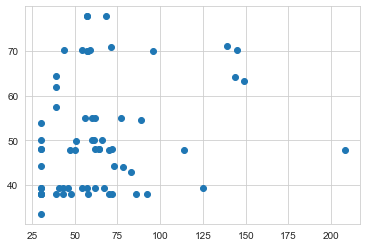

In [101]:
plt.scatter(y_test, predictions)

(array([22., 16., 14.,  6.,  2.,  3.,  2.,  0.,  0.,  1.]),
 array([-26.25668335,  -7.62199516,  11.01269302,  29.64738121,
         48.2820694 ,  66.91675758,  85.55144577, 104.18613396,
        122.82082214, 141.45551033, 160.09019852]),
 <BarContainer object of 10 artists>)

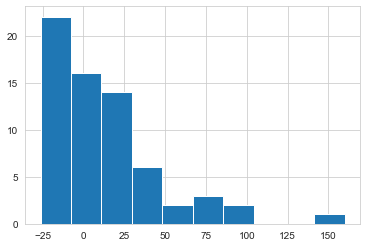

In [102]:
plt.hist(y_test - predictions.reshape(66,1))

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24.18222392689098
MSE: 1295.1743727757312
RMSE: 35.988531128343254
